In [12]:
#! pip install pandas
#!pip install numpy
import pandas as pd
import numpy as np
import datetime

In [13]:
#Bring main dataset
netflix_data = pd.read_csv('netflix_titles.csv', index_col = 0)

In [123]:
#Netflix doesn't have user ratings anymore, so we need to bring imdb ratings

#Due to dataset size issues, we have to work with a modified version of the IMDB dataset. 
#This is the code that was used to create it 

#rating_info = pd.read_csv('titleratings.tsv', delimiter='\t', usecols=['tconst','averageRating'])
#title_info = pd.read_csv('titlebasics.tsv', delimiter='\t', usecols=['tconst','primaryTitle'])

#Merge by unique ID
#imdb_ratings = title_info.merge(rating_info, on='tconst')
#imdb_ratings = imdb_ratings.drop_duplicates(subset=['primaryTitle'])

#imdb_ratings.to_csv('imdb_ratings.csv')

imdb_ratings = pd.read_csv('imdb_ratings.csv', index_col=0)

In [143]:
#Add rating column to the main dataset and delete unnecesary columns
netflix_df = netflix_data.merge(imdb_ratings, how='left', right_on='primaryTitle', left_on='title')
netflix_df = netflix_df.drop(['tconst', 'primaryTitle', 'director', 'cast', 'country', 'duration', 'description'],axis=1)

In [144]:
#Clean up 

#Change averageRating and listed_in labels for clarity

#list(netflix_df.columns)
netflix_df.columns = ['type', 'title', 'date_added',
       'release_year', 'rating', 'categories',
       'average_score']
netflix_df.columns

#Change Date column to datetime

netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'])



In [148]:
#NaN Values

# Keep only rows with user score, since it is the base for camparing
netflix_df = netflix_df.dropna(axis=0, subset='average_score')

#Fill NaN on date with  ff fill (df is in order so we infer the date)
netflix_df['date_added'] = netflix_df['date_added'].fillna(method='ffill')

#Fill Nan on Rating with most common value 
netflix_df['rating'] = netflix_df['rating'].fillna(netflix_df['rating'].mode())

#Create year column to create over time comparison
netflix_df['year_added'] = pd.DatetimeIndex(netflix_df['date_added']).year


<AxesSubplot:xlabel='year_added'>

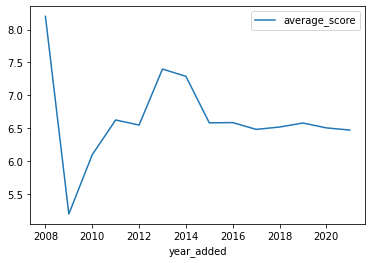

In [156]:
#Yearly trend - Content added vs rating

year_avg = netflix_df.groupby('year_added')['average_score'].mean()
year_avg = pd.DataFrame(year_avg)
year_avg.plot.line( y=['average_score'])

In [157]:
year_avg

,average_score
year_added,
2008,8.200000
2009,5.200000
2010,6.100000
2011,6.627273
2012,6.550000
2013,7.400000
2014,7.289474
2015,6.583582
2016,6.587463


<AxesSubplot:xlabel='type'>

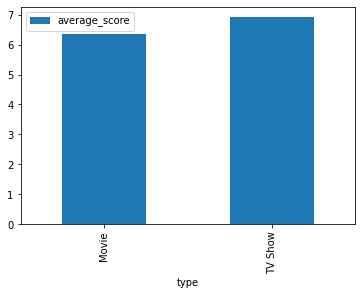

In [158]:
#Score by type of content

type_avg = netflix_df.groupby('type')['average_score'].mean()
type_avg = pd.DataFrame(type_avg)
type_avg.plot.bar( y=['average_score'])

In [159]:
type_avg

,average_score
type,
Movie,6.355836
TV Show,6.928770


<AxesSubplot:xlabel='categories'>

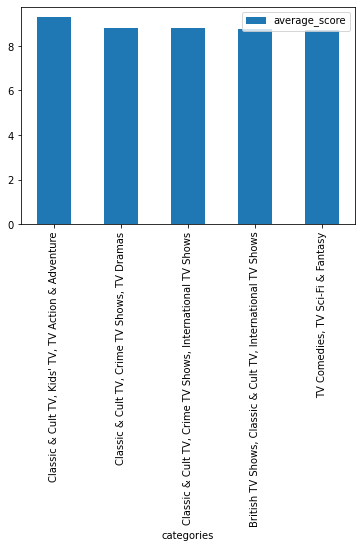

In [160]:
#More popular categories by weighted average score

category_avg = netflix_df.groupby('categories')['average_score'].mean()
category_avg = pd.DataFrame(category_avg)

top5_categories = category_avg.sort_values('average_score', ascending=False).head(5)
top5_categories.plot.bar( y=['average_score'])